In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

In [33]:
plt.rcParams["figure.figsize"] = (20,10)

In [94]:
# data file path
data = "../data"
output_folder = '../output/'

In [35]:
# read in csv
# import raw data
q_gdp_yoy_raw = pd.read_csv(data+'/gdp_quarterly_yoy.csv')

In [36]:
# assign to different df
q_gdp_yoy=q_gdp_yoy_raw

In [37]:
# select specific columns
q_gdp_yoy =q_gdp_yoy.drop(columns=['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'])

In [38]:
# rename columns
q_gdp_yoy = q_gdp_yoy.rename({'LOCATION': 'country', 'TIME': 'year_quarter', 'Value': 'value'}, axis=1)

In [39]:
list_of_countries = ['AUS', 'BRA', 'CAN', 'CHN', 'DEU', 'GBR', 'IND', 'JPN', 'KOR', 'USA']
print(list_of_countries)
# Australia, China, Canada, Germany, UK, Japan, South Korea, Brazil, India, USA

['AUS', 'BRA', 'CAN', 'CHN', 'DEU', 'GBR', 'IND', 'JPN', 'KOR', 'USA']


In [40]:
# filter df for countries in list_of_countries
q_gdp = q_gdp[q_gdp['country'].isin(list_of_countries)]

q_gdp_yoy = q_gdp_yoy[q_gdp_yoy['country'].isin(list_of_countries)]

In [41]:
# change from country indicator to name
def change_country_to_name(df):
    if df['country'] == 'AUS':
        return 'Australia'
    if df['country'] == 'BRA':
        return 'Brazil'
    if df['country'] == 'CAN':
        return 'Canada'
    if df['country'] == 'CHN':
        return 'China'
    if df['country'] == 'DEU':
        return 'Germany'  
    if df['country'] == 'GBR':
        return 'UK' 
    if df['country'] == 'IND':
        return 'India' 
    if df['country'] == 'JPN':
        return 'Japan'  
    if df['country'] == 'KOR':
        return 'South Korea' 
    if df['country'] == 'USA':
        return 'USA'   
    else: 
        return ValueError('Unkdown Country')

In [42]:
q_gdp_yoy['country_name'] = q_gdp_yoy.apply(change_country_to_name, axis = 1)

In [43]:
# drop country column
q_gdp_yoy = q_gdp_yoy.drop('country', axis=1)

In [45]:
list_of_country_names = sorted(list(q_gdp_yoy['country_name'].unique()))
print(list_of_country_names)


['Australia', 'Brazil', 'Canada', 'China', 'Germany', 'India', 'Japan', 'South Korea', 'UK', 'USA']


In [46]:
# convert to quarterly data with a timestamp
q_gdp_yoy['year_quarter_dt'] = pd.PeriodIndex(q_gdp_yoy['year_quarter'], freq='Q').to_timestamp()

In [47]:
# take up until end 2019
q_gdp_yoy = q_gdp_yoy[q_gdp_yoy['year_quarter_dt'] < '2020-01-01']

In [48]:
# pivot to wide
q_gdp_yoy_wide = q_gdp_yoy.pivot(index='year_quarter_dt', columns='country_name', values='value')

# drop index
q_gdp_yoy_wide = q_gdp_yoy_wide.reset_index()


# Plot

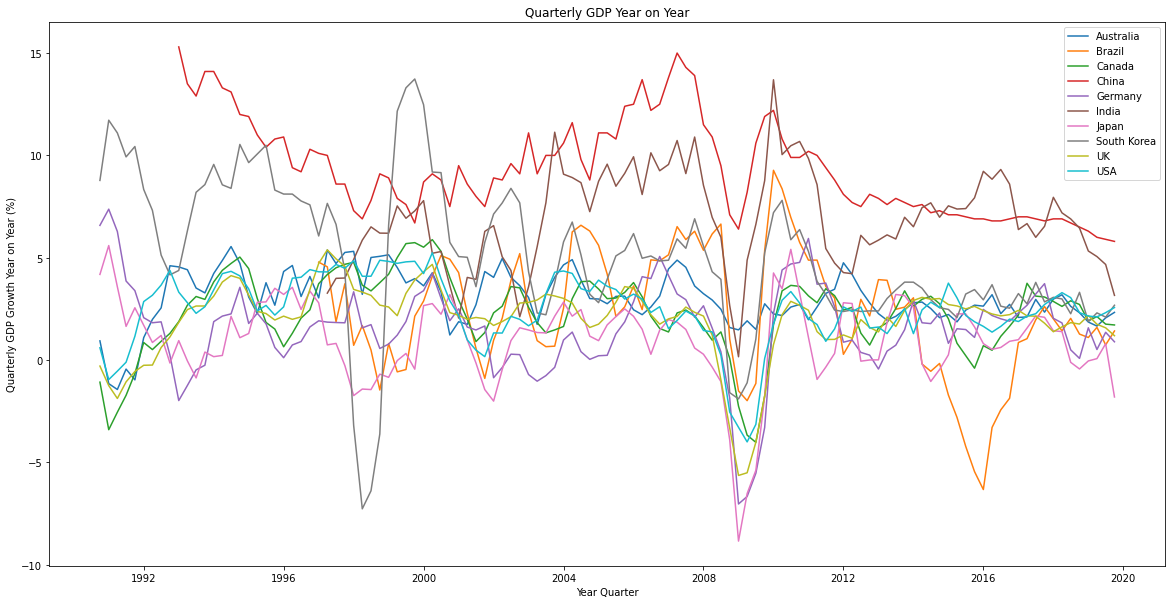

In [98]:
# plot lines
x = q_gdp_yoy_wide['year_quarter_dt']
plt.plot(x, q_gdp_yoy_wide['Australia'], label = "Australia", linestyle="-")
plt.plot(x, q_gdp_yoy_wide['Brazil'], label = "Brazil", linestyle="-")
plt.plot(x, q_gdp_yoy_wide['Canada'], label = "Canada", linestyle="-")
plt.plot(x, q_gdp_yoy_wide['China'], label = "China", linestyle="-")
plt.plot(x, q_gdp_yoy_wide['Germany'], label = "Germany", linestyle="-")
plt.plot(x, q_gdp_yoy_wide['India'], label = "India", linestyle="-")
plt.plot(x, q_gdp_yoy_wide['Japan'], label = "Japan", linestyle="-")
plt.plot(x, q_gdp_yoy_wide['South Korea'], label = "South Korea", linestyle="-")
plt.plot(x, q_gdp_yoy_wide['UK'], label = "UK", linestyle="-")
plt.plot(x, q_gdp_yoy_wide['USA'], label = "USA", linestyle="-")
plt.legend()
plt.title("Quarterly GDP Year on Year")
plt.xlabel("Year Quarter")
plt.ylabel("Quarterly GDP Growth Year on Year (%)")
plt.savefig(output_folder+'quarterly_gdp_yoy.jpg', bbox_inches='tight')
plt.show()


# Autocorrelation

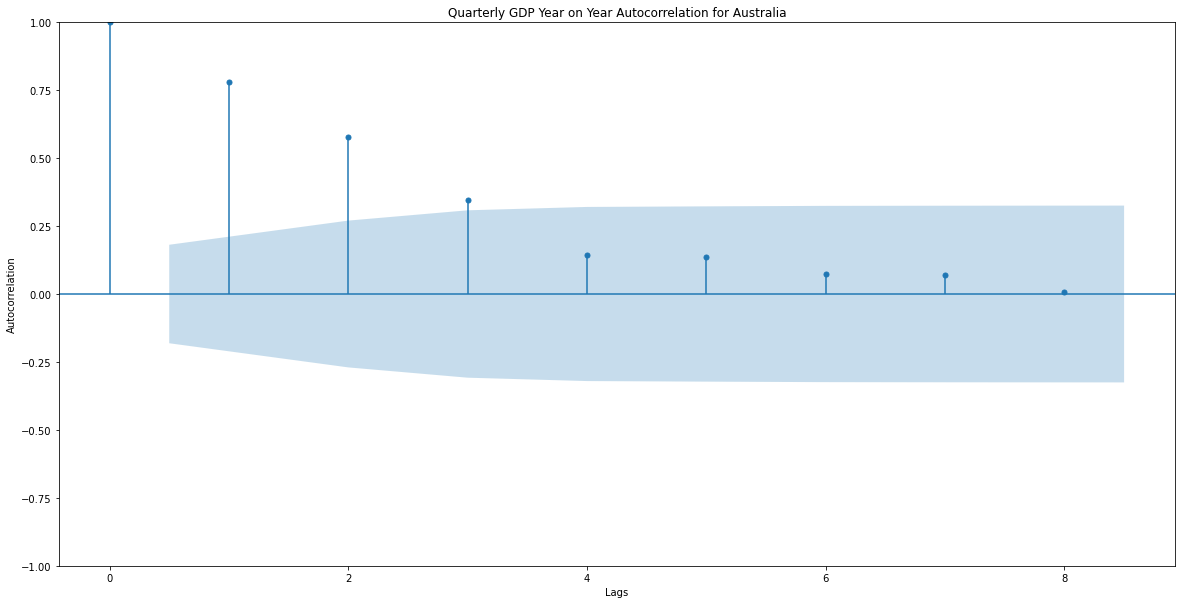

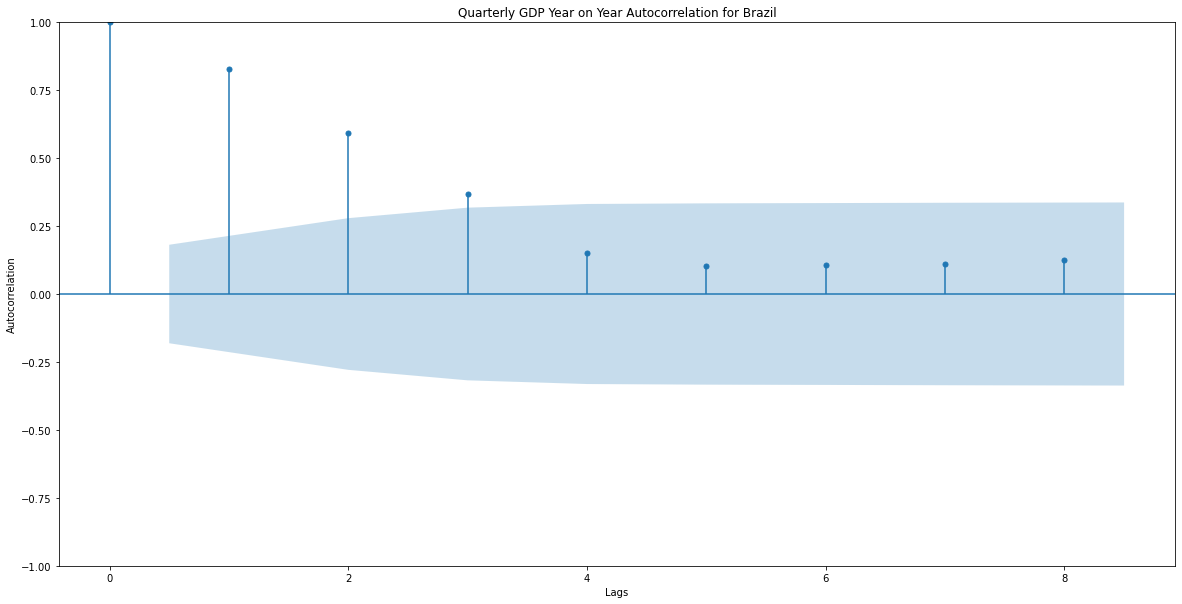

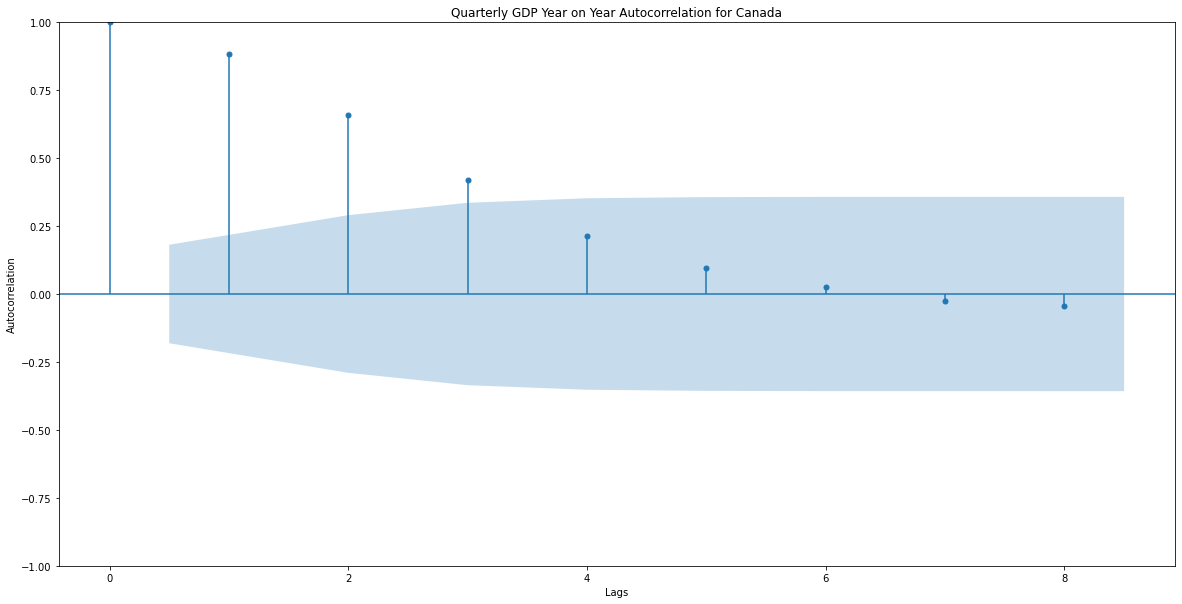

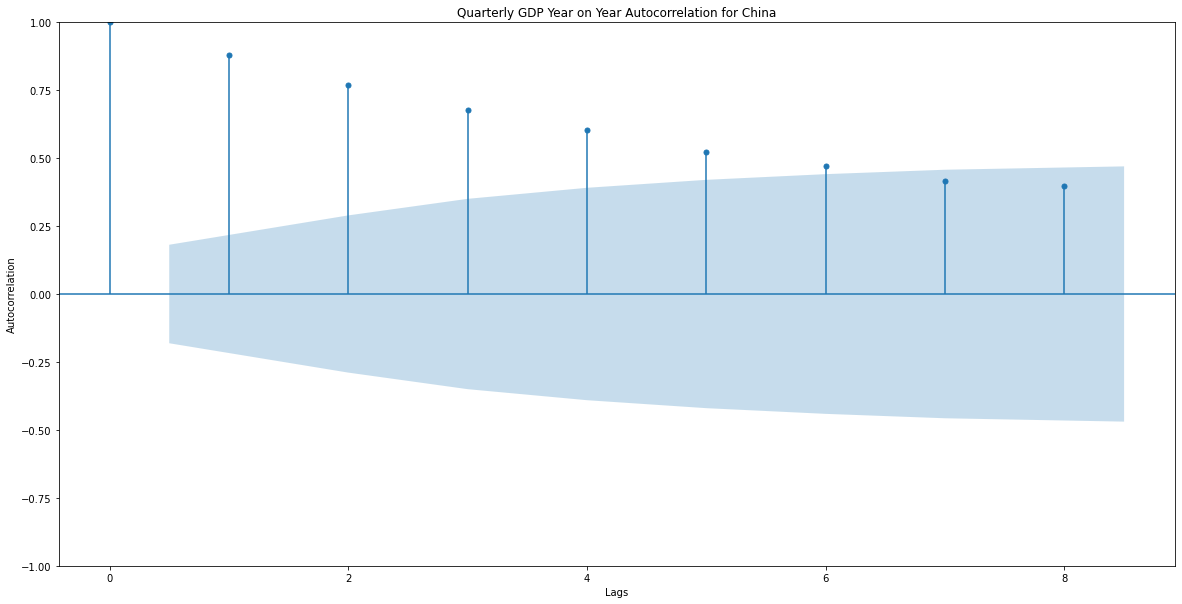

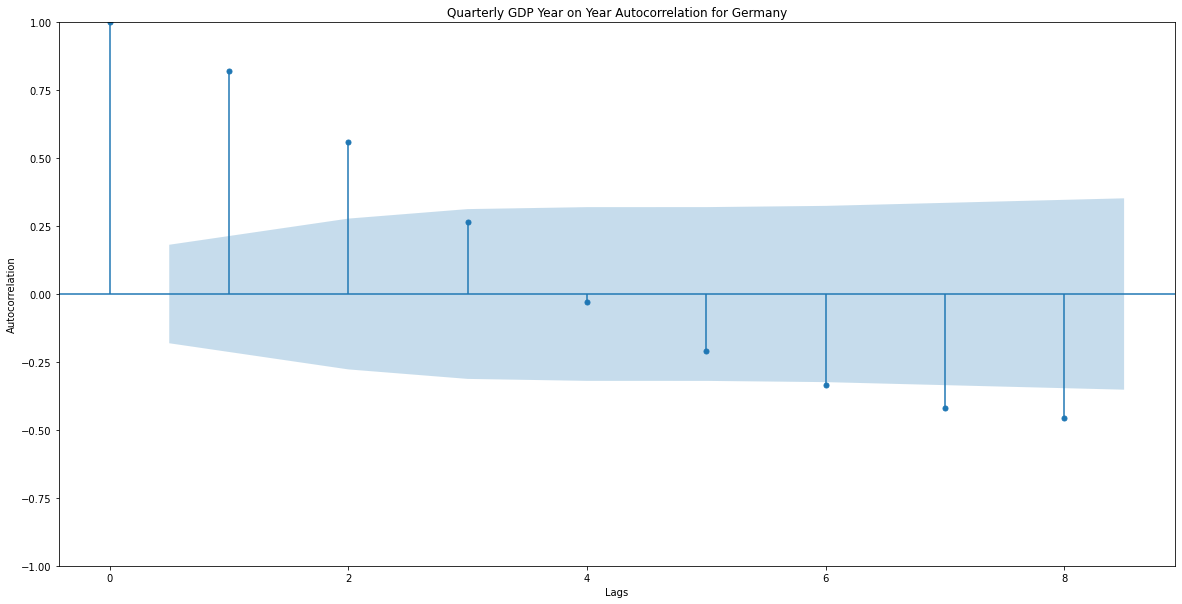

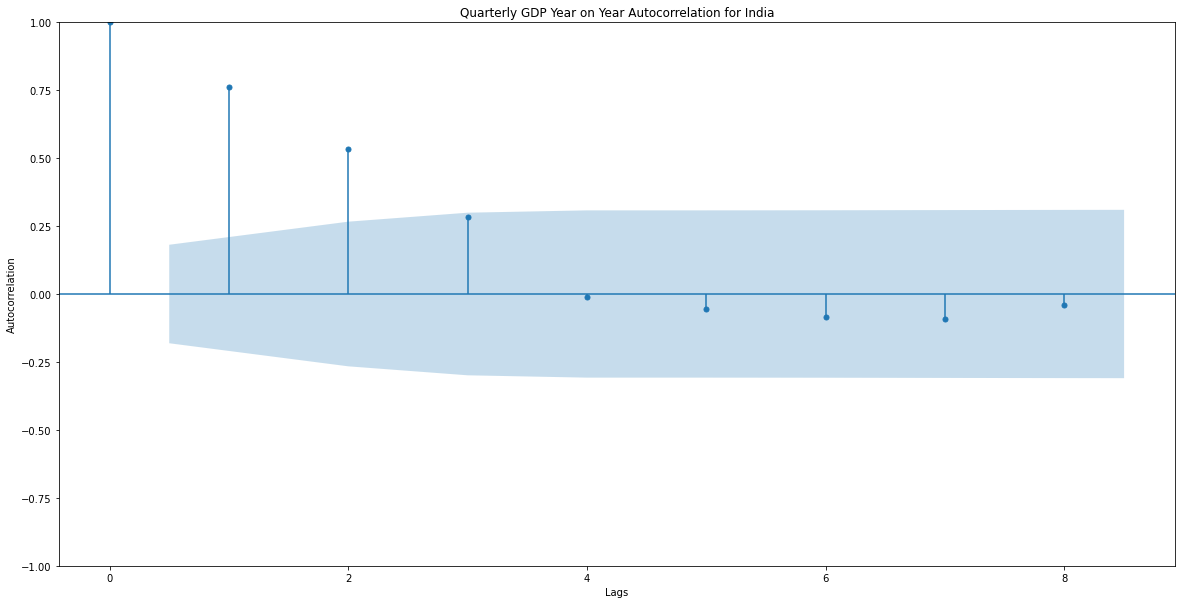

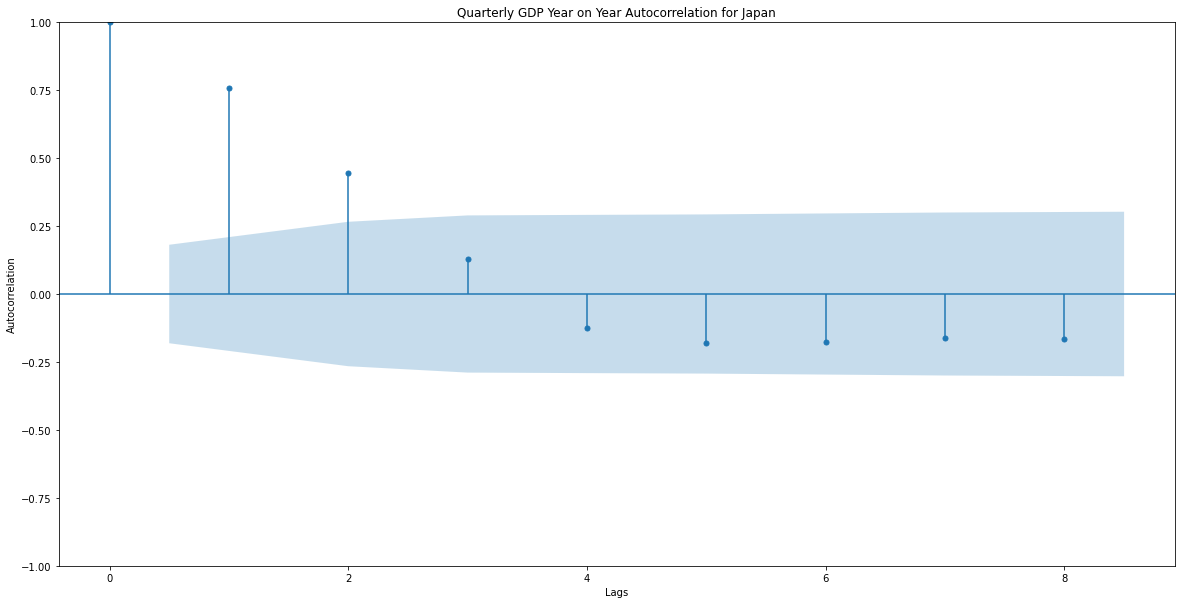

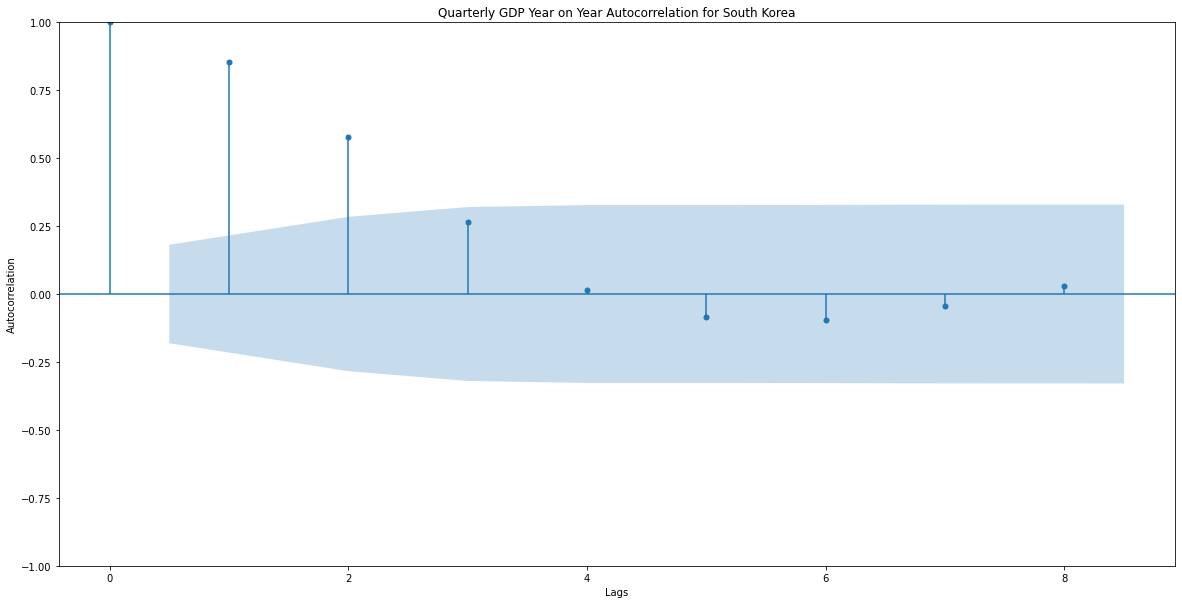

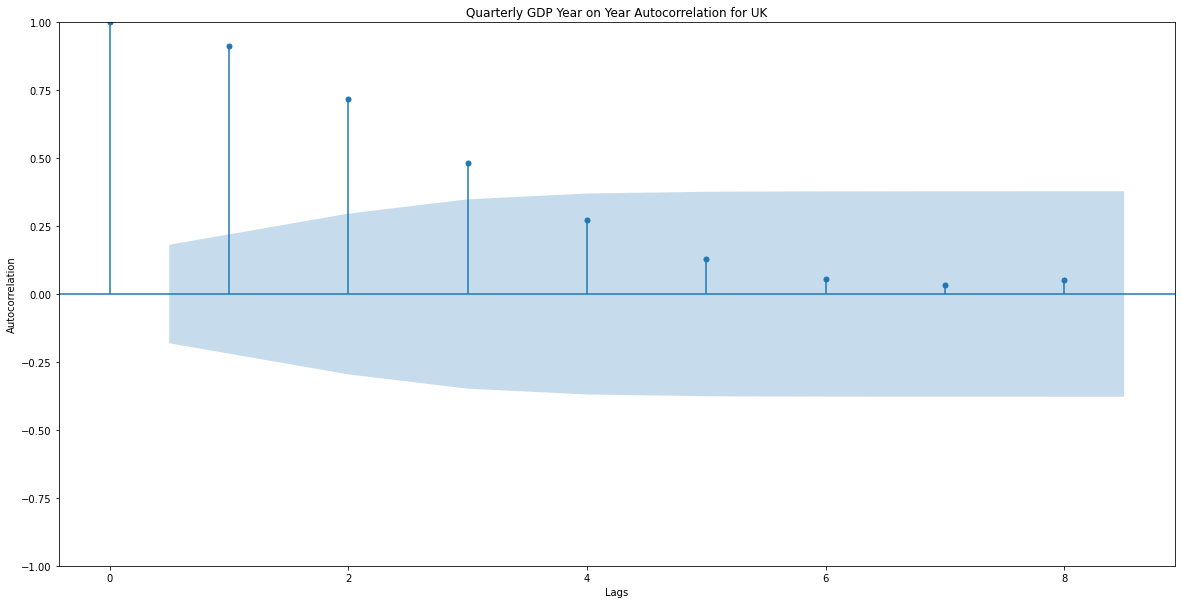

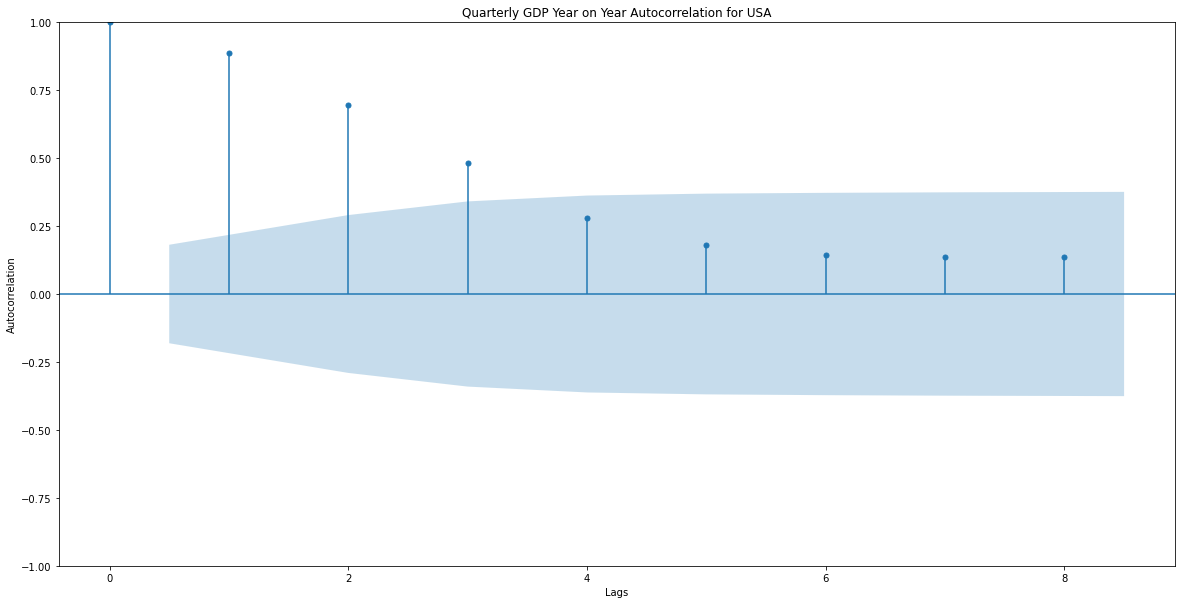

In [99]:
for i in list_of_country_names:
    plot_name = 'quarterly_gdp_yoy_{}.jpg'.format(i)
    plot_acf(q_gdp_yoy_wide[i], alpha=.05, lags=8, missing='drop')
    plt.title("Quarterly GDP Year on Year Autocorrelation for {}".format(i))
    plt.xlabel("Lags")
    plt.ylabel("Autocorrelation")
    plt.savefig(output_folder+plot_name, bbox_inches='tight')
    plt.show()

In [73]:
for i in list_of_country_names:
    print(i)
    s = q_gdp_yoy[q_gdp_yoy['country_name'] == i]
    ac = acf(s['value'], alpha=0.5, nlags=8)
    print(ac[1]) # get second element, which is confidence intervals

Australia
[[ 1.          1.        ]
 [ 0.71909751  0.84381071]
 [ 0.48435578  0.67023037]
 [ 0.23867425  0.45060875]
 [ 0.0340337   0.25451278]
 [ 0.02334945  0.24529202]
 [-0.0386469   0.18455645]
 [-0.0425383   0.18103562]
 [-0.10456279  0.11934449]]
Brazil
[[ 1.          1.        ]
 [ 0.75771087  0.89835171]
 [ 0.48416402  0.70073591]
 [ 0.24309978  0.48965345]
 [ 0.02368832  0.28078535]
 [-0.02686979  0.23200416]
 [-0.02322056  0.23645595]
 [-0.02113752  0.23940342]
 [-0.00495779  0.25648577]]
Canada
[[ 1.          1.        ]
 [ 0.82168759  0.94640079]
 [ 0.55847951  0.75814017]
 [ 0.30304312  0.53400886]
 [ 0.0915843   0.33405896]
 [-0.02753819  0.21782456]
 [-0.09552688  0.15040902]
 [-0.14766473  0.09831878]
 [-0.16585936  0.08016264]]
China
[[1.         1.        ]
 [0.81468288 0.94448849]
 [0.66656254 0.87373742]
 [0.5516748  0.80249217]
 [0.46160877 0.74153445]
 [0.37339987 0.67432122]
 [0.31317323 0.62908726]
 [0.25365149 0.58119023]
 [0.22733243 0.56371516]]
Germany
[[ 1

# Correlation Between Series

In [84]:
corr_matrix = round(q_gdp_yoy_wide.corr(method='pearson'), 2)

In [85]:

corr_matrix

country_name,Australia,Brazil,Canada,China,Germany,India,Japan,South Korea,UK,USA
country_name,,,,,,,,,,
Australia,1.00,0.11,0.58,0.36,-0.14,0.04,-0.08,-0.00,0.55,0.58
Brazil,0.11,1.00,0.34,0.62,0.31,0.23,0.37,0.35,0.11,0.16
Canada,0.58,0.34,1.00,0.09,0.28,0.02,0.22,0.18,0.79,0.78
China,0.36,0.62,0.09,1.00,0.09,0.51,0.21,0.41,0.14,0.12
Germany,-0.14,0.31,0.28,0.09,1.00,0.39,0.64,0.37,0.40,0.31
India,0.04,0.23,0.02,0.51,0.39,1.00,0.41,0.23,0.21,0.23
Japan,-0.08,0.37,0.22,0.21,0.64,0.41,1.00,0.47,0.44,0.41
South Korea,-0.00,0.35,0.18,0.41,0.37,0.23,0.47,1.00,0.20,0.20
UK,0.55,0.11,0.79,0.14,0.40,0.21,0.44,0.20,1.00,0.82


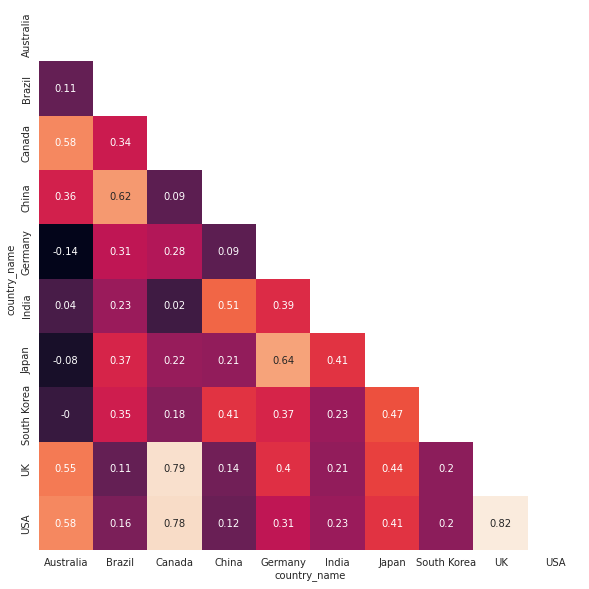

In [101]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr_matrix, annot=True, cbar=False)
with sns.axes_style("white"):
    f, ax = plt.subplots()
    ax = sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, cbar=False)
    plt.savefig(output_folder+'corr_matrix', bbox_inches='tight')